In [3]:
import pickle
import operator as op
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.insert(1, "/home/robin/Documents/robin/crop-type-mapping")
print(sys.path)
from collections import defaultdict
from constants import *

sns.set()

['/home/robin/anaconda3/envs/croptype/lib/python36.zip', '/home/robin/Documents/robin/crop-type-mapping', '/home/robin/anaconda3/envs/croptype/lib/python36.zip/..', '/home/robin/anaconda3/envs/croptype/lib/python36.zip/..', '/home/robin/anaconda3/envs/croptype/lib/python3.6', '/home/robin/anaconda3/envs/croptype/lib/python3.6/lib-dynload', '', '/home/robin/.local/lib/python3.6/site-packages', '/home/robin/.local/lib/python3.6/site-packages/pycocotools-2.0-py3.6-linux-x86_64.egg', '/home/robin/anaconda3/lib/python3.6/site-packages', '/home/robin/anaconda3/envs/croptype/lib/python3.6/site-packages', '/home/robin/anaconda3/envs/croptype/lib/python3.6/site-packages/Mako-1.0.7-py3.6.egg', '/home/robin/anaconda3/envs/croptype/lib/python3.6/site-packages/pip-19.0.3-py3.6.egg', '/home/robin/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/robin/.ipython']


In [4]:
def make_boxplots(data_dict, hp_name, perf_measure, log_scaling):
    sorted_keys, sorted_vals = zip(*sorted(data_dict.items(), key=op.itemgetter(0)))
    ax = sns.boxplot(data=sorted_vals)
    ax = sns.swarmplot(data=sorted_vals, color=".25")
    ax.set(xlabel=hp_name, ylabel=perf_measure)
    plt.xticks(plt.xticks()[0], sorted_keys)
    plt.show()

def make_scatterplot(x, y, hp_name, perf_measure, log_scaling):
    ax = sns.scatterplot(x=x, y=y)     
    ax.set(xlabel=hp_name, ylabel=perf_measure)
    if log_scaling:
        ax.set_xscale("log")
        ax.set_xlim([min(x), max(x)])
    plt.show()

    

In [11]:
def plot_hps(hps_pkl_path):
    with open(hps_pkl_path, 'rb') as hps_pkl:
        hps = pickle.load(hps_pkl)
        # just pick any of the results
        results = hps['lr']
        train_f1 = [result[2] for result in results]
        val_f1 = [result[-2] for result in results]
        
        train_loss = [result[1] for result in results]
        val_loss = [result[-3] for result in results]
        
        train_acc = [result[3] for result in results]
        val_acc = [result[-1] for result in results]
        
        make_scatterplot(train_f1, val_f1, 'train f1', 'val f1', False)
        make_scatterplot(train_loss, train_f1, 'train loss', 'train f1', False)
        make_scatterplot(val_loss, val_f1, 'val loss', 'val f1', False)
        make_scatterplot(train_loss, val_f1, 'train loss', 'val f1', False)
        make_scatterplot(train_acc, val_acc, 'train acc', 'val acc', False)
        make_scatterplot(val_acc, val_f1, 'val acc', 'val f1', False)
        
        
        for hp in hps:
            results = hps[hp]
            
            # create box plots if discrete
            if hp in STRING_HP or hp in INT_HP or hp in INT_POWER_EXP or hp in BOOL_HP or hp in INT_CHOICE_HP:
                train_f1_results = defaultdict(list)
                train_loss_results = defaultdict(list)
                train_acc_results = defaultdict(list)
                
                val_f1_results = defaultdict(list)
                val_loss_results = defaultdict(list)
                val_acc_results = defaultdict(list)
                
                for result in results:
                    # result structured as [hp_name, train_loss, train_f1, val_loss, val_f1]
                    
                    train_f1_results[result[0]].append(result[2])
                    train_loss_results[result[0]].append(result[1])
                    train_acc_results[result[0]].append(result[3])
                    
                    val_f1_results[result[0]].append(result[-2])
                    val_loss_results[result[0]].append(result[-3])
                    val_acc_results[result[0]].append(result[-1])
                
                make_boxplots(train_f1_results, hp, "train f1", log_scaling = hp in INT_POWER_EXP)
                make_boxplots(train_loss_results, hp, "train loss", log_scaling = hp in INT_POWER_EXP)
                
                make_boxplots(val_f1_results, hp, "val f1", log_scaling = hp in INT_POWER_EXP)
                make_boxplots(val_loss_results, hp, "val loss", log_scaling = hp in INT_POWER_EXP)
                
                make_boxplots(train_acc_results, hp, "train acc", log_scaling = hp in INT_POWER_EXP)
                make_boxplots(val_acc_results, hp, "val acc", log_scaling = hp in INT_POWER_EXP)
            
            # create scatter plots if real
            if hp in FLOAT_HP or hp in REAL_POWER_EXP:
                    
                vals = [result[0] for result in results]
                train_f1_results = []
                train_loss_results = []
                train_acc_results = []
                
                val_f1_results = []
                val_loss_results = []
                val_acc_results = []
                
                for result in results:
                    # result structured as [hp_name, train_loss, train_f1, val_loss, val_f1]
                    
                    train_f1_results.append(result[2])
                    train_loss_results.append(result[1])
                    train_acc_results.append(result[3])
                    
                    val_f1_results.append(result[-2])
                    val_loss_results.append(result[-3])
                    val_acc_results.append(result[-1])
                    
                make_scatterplot(vals, train_f1_results, hp, "train f1", log_scaling = hp in REAL_POWER_EXP)
                make_scatterplot(vals, train_loss_results, hp, "train loss", log_scaling = hp in REAL_POWER_EXP)
            
                make_scatterplot(vals, val_f1_results, hp, "val f1", log_scaling = hp in REAL_POWER_EXP)
                make_scatterplot(vals, val_loss_results, hp, "val loss", log_scaling = hp in REAL_POWER_EXP)
                
                make_scatterplot(vals, train_acc_results, hp, "train acc", log_scaling = hp in INT_POWER_EXP)
                make_scatterplot(vals, val_acc_results, hp, "val acc", log_scaling = hp in INT_POWER_EXP)
            
            

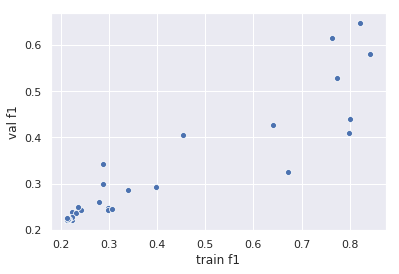

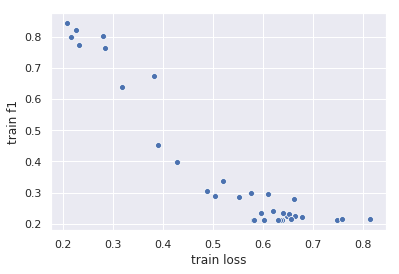

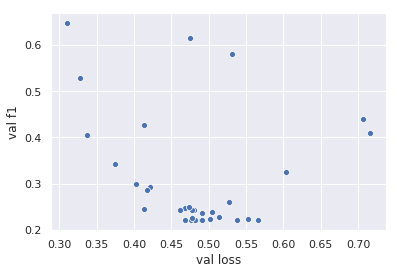

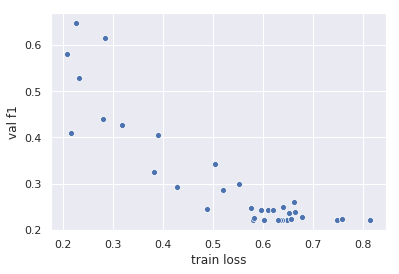

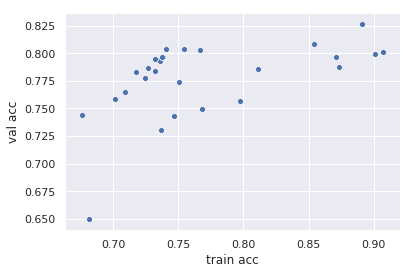

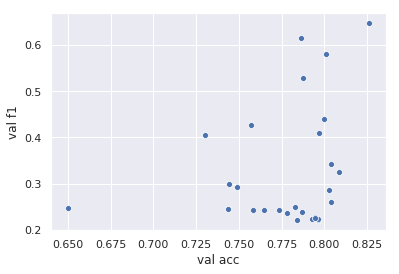

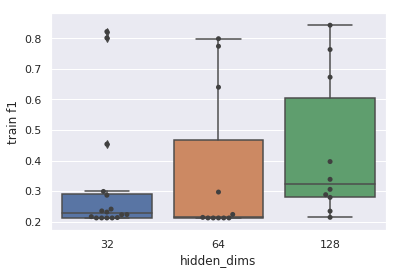

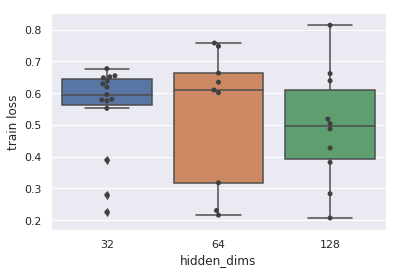

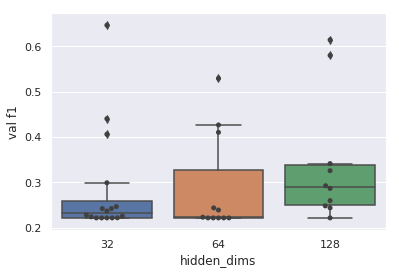

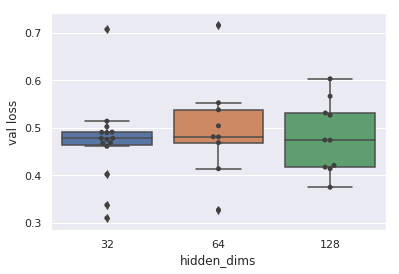

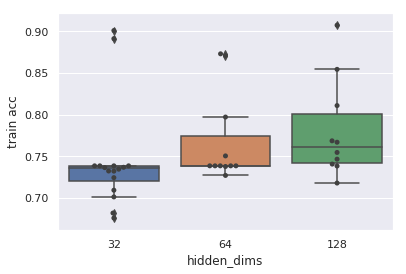

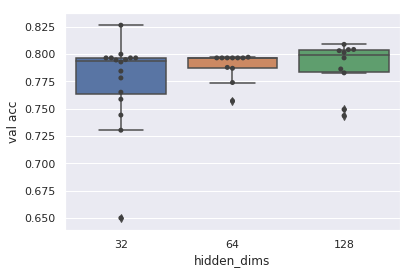

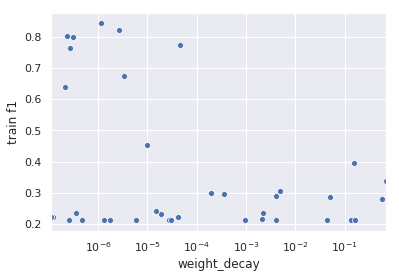

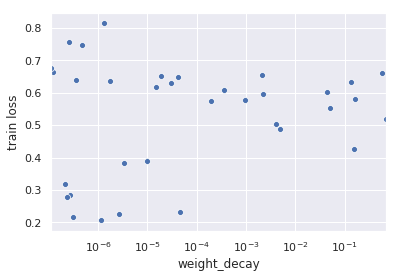

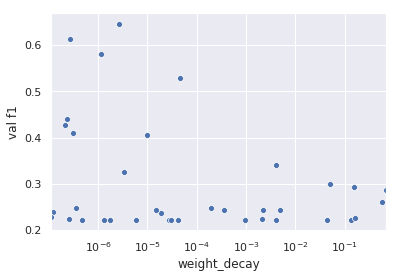

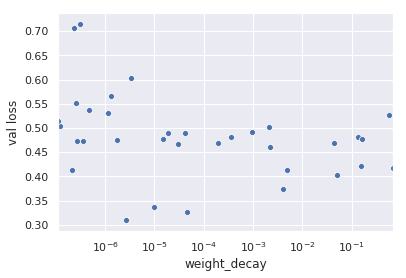

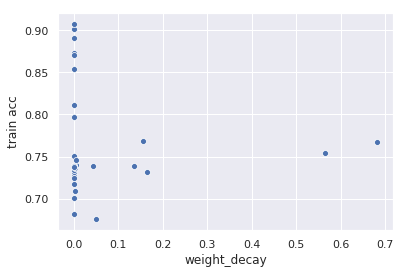

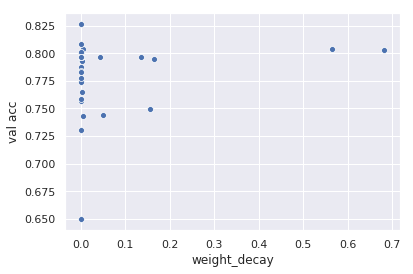

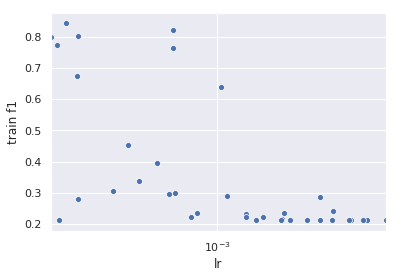

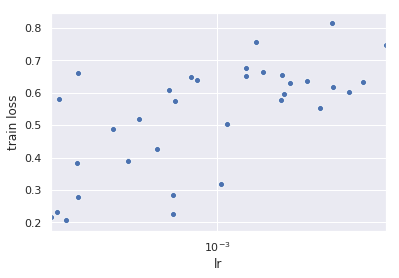

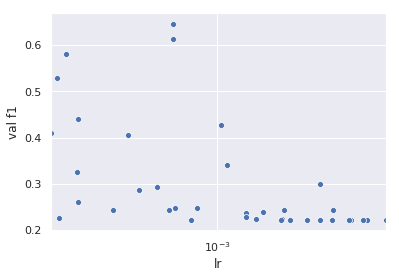

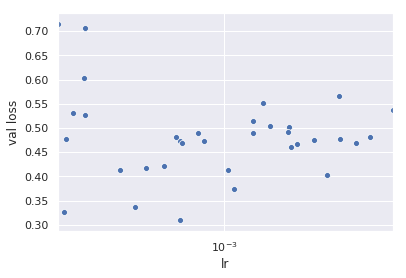

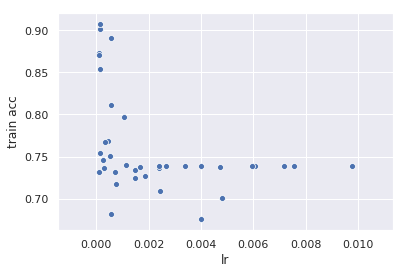

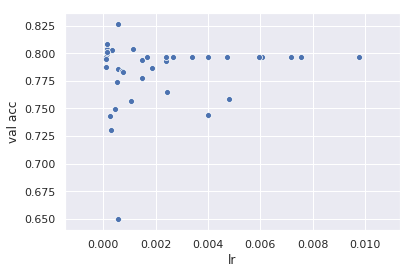

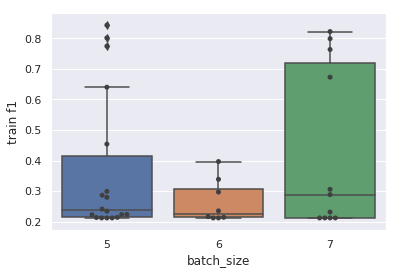

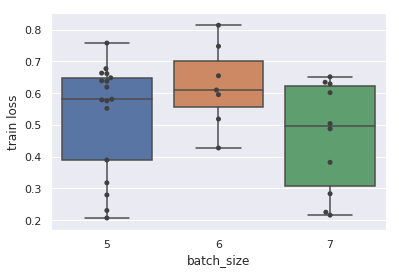

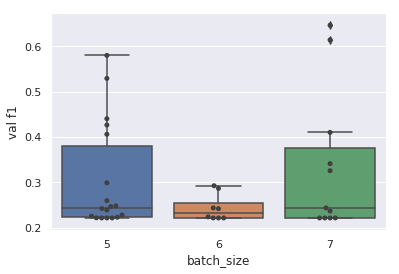

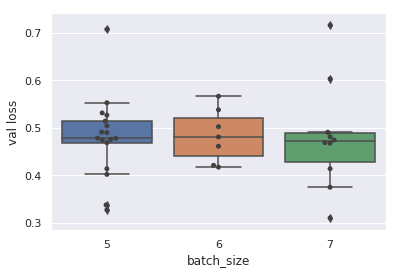

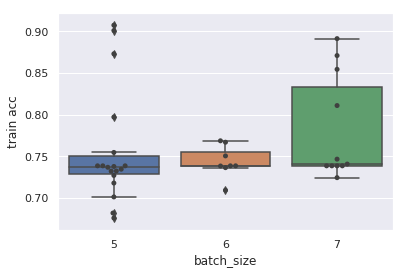

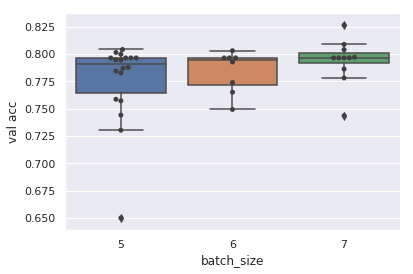

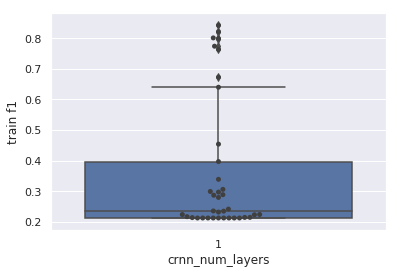

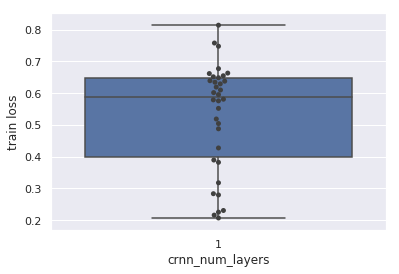

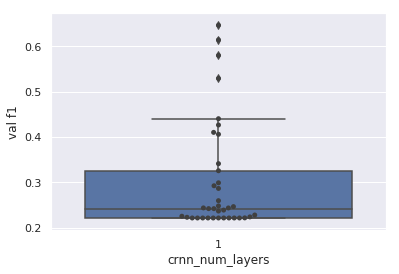

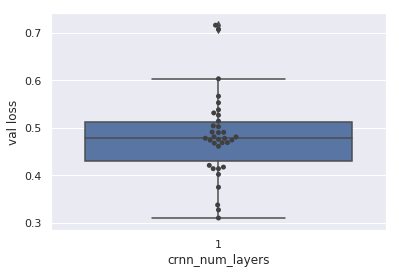

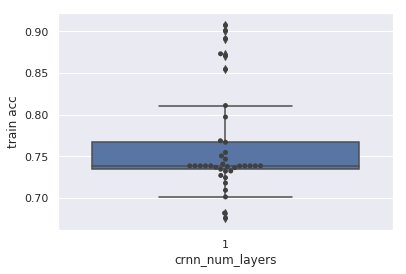

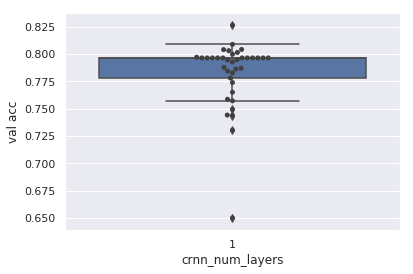

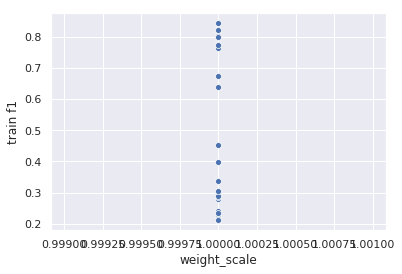

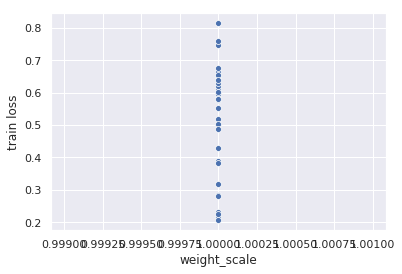

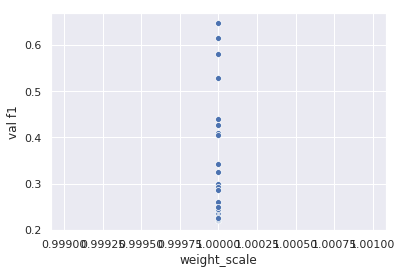

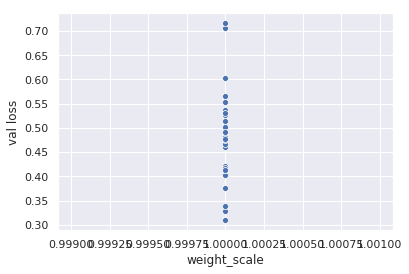

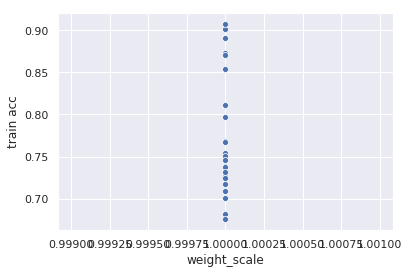

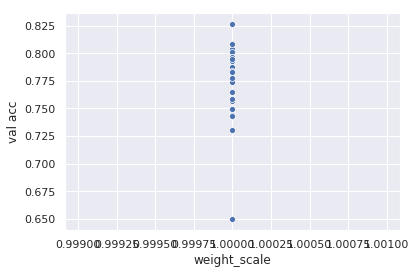

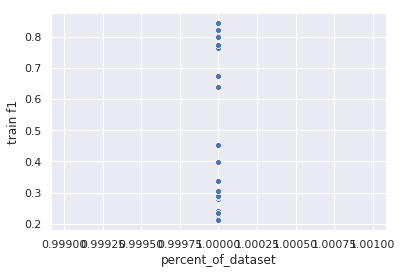

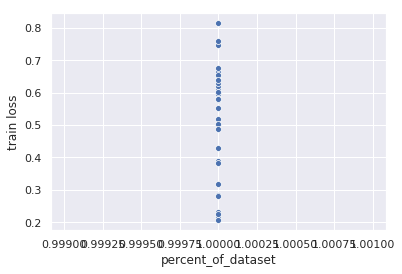

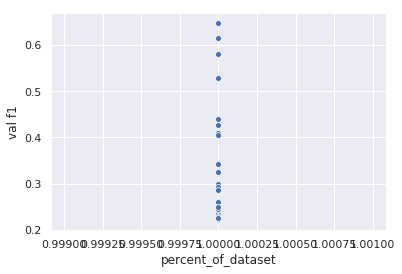

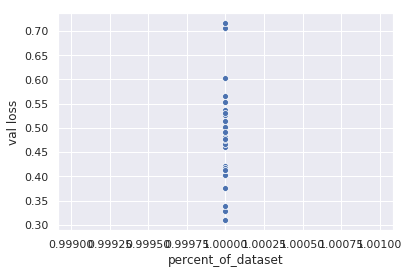

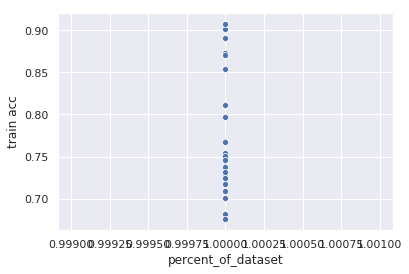

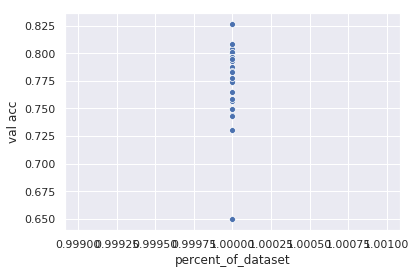

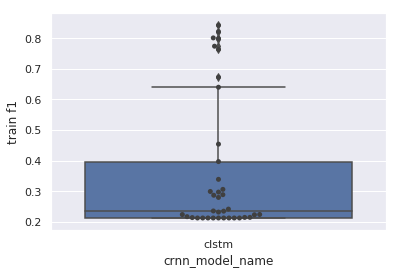

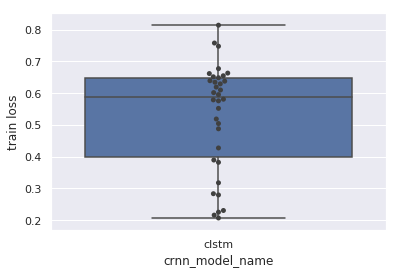

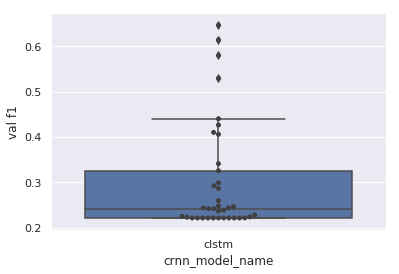

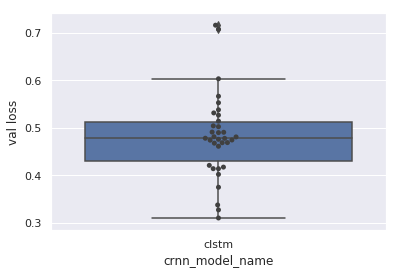

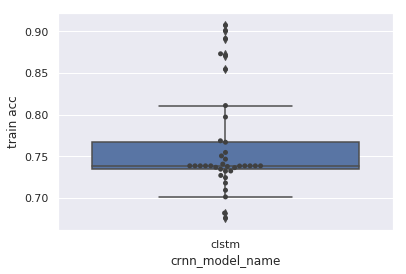

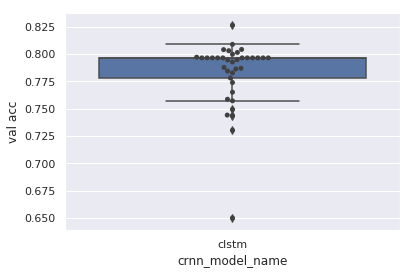

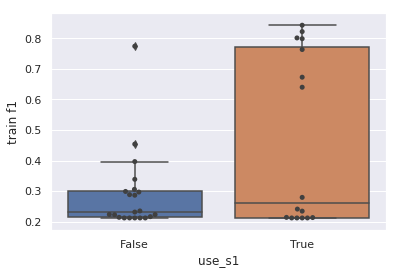

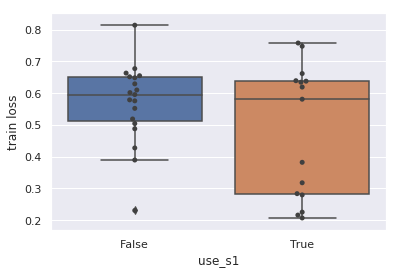

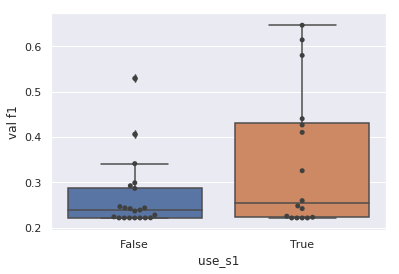

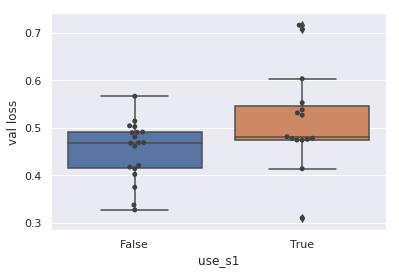

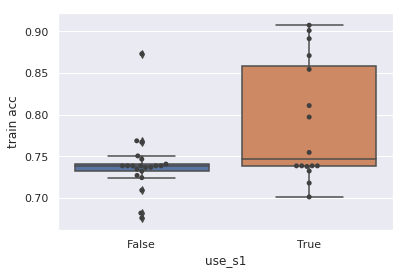

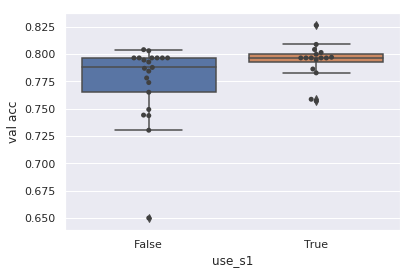

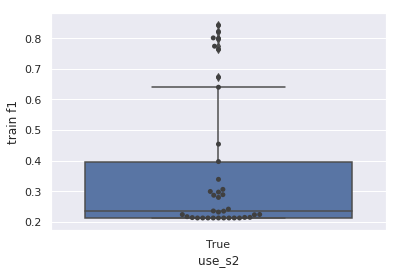

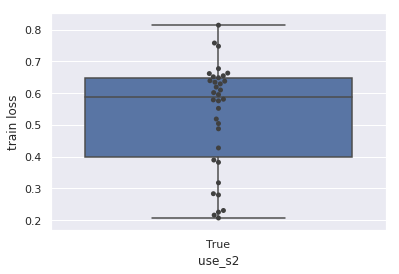

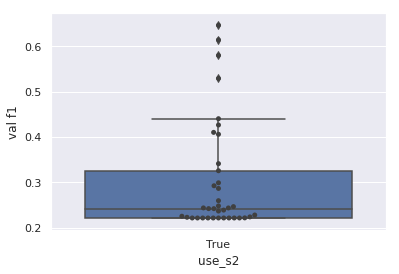

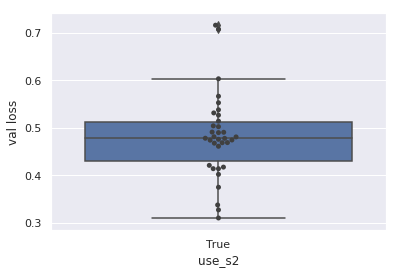

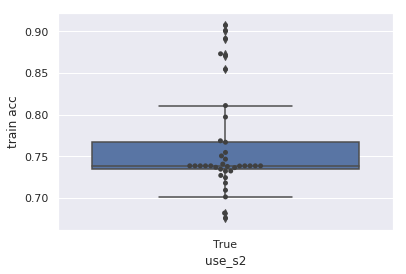

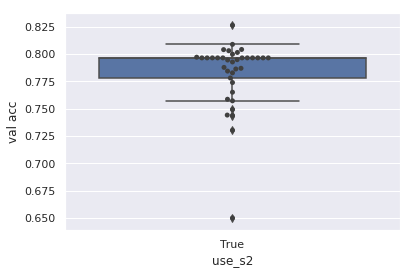

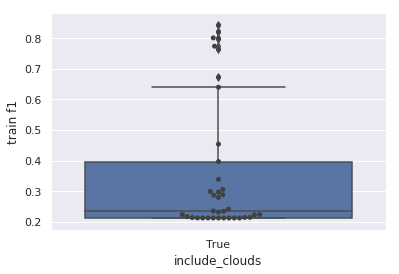

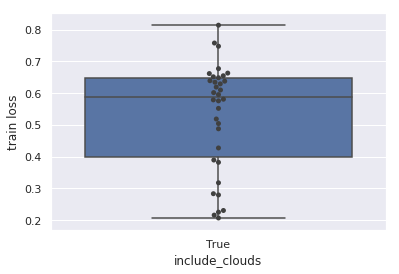

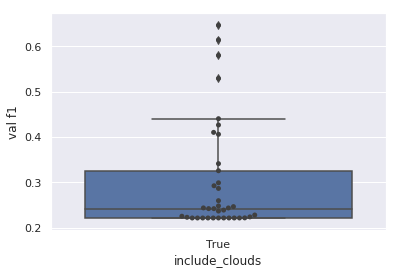

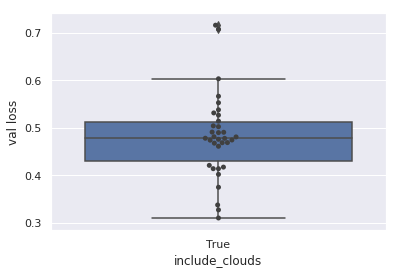

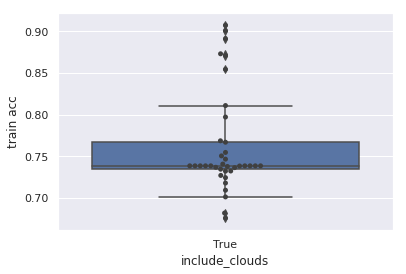

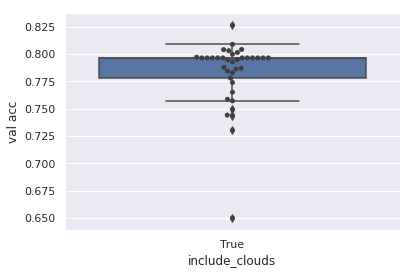

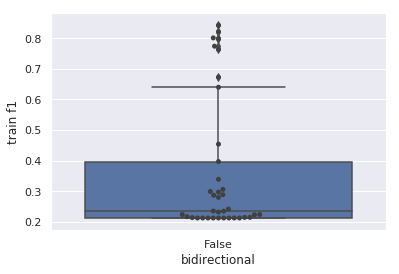

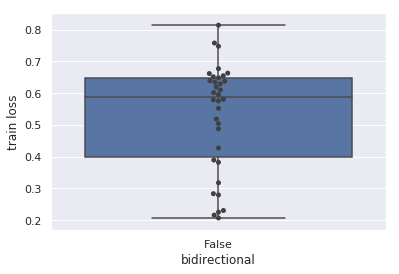

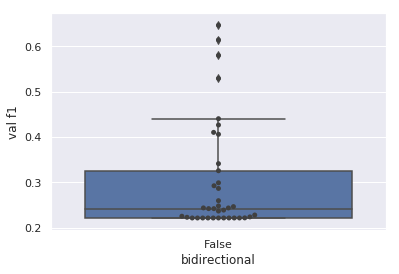

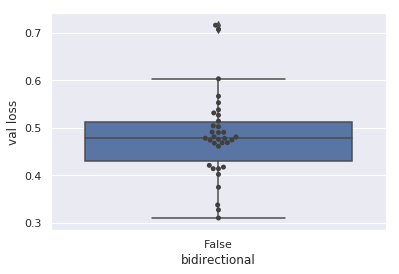

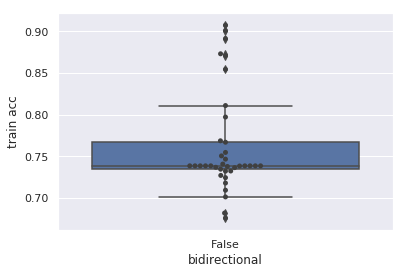

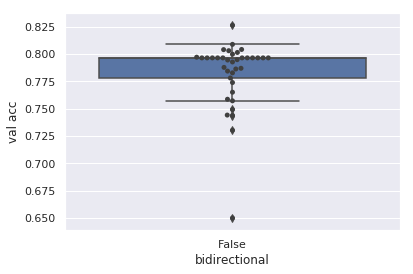

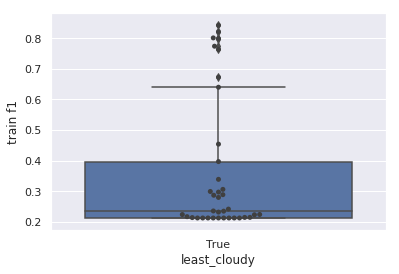

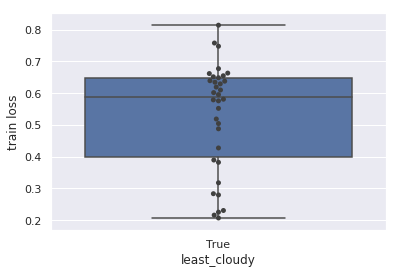

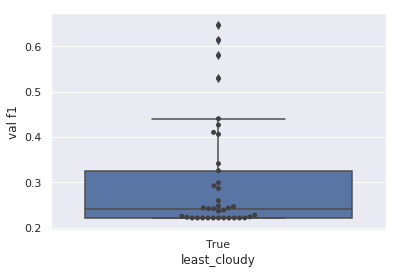

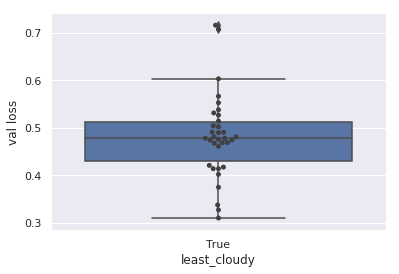

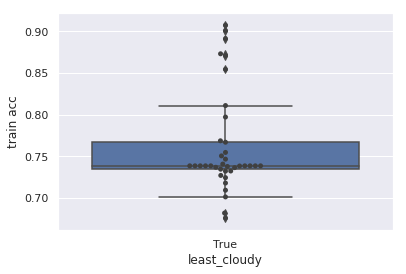

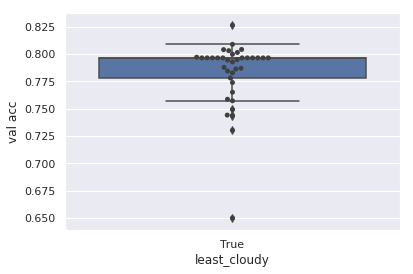

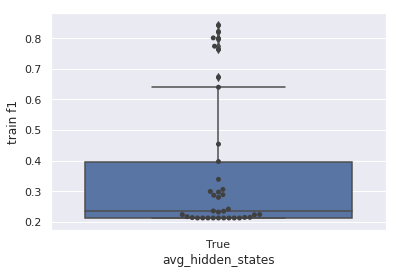

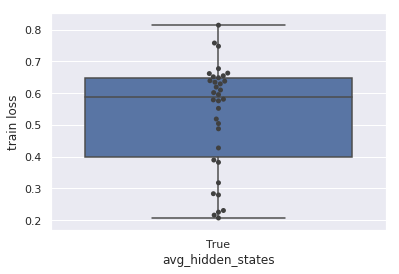

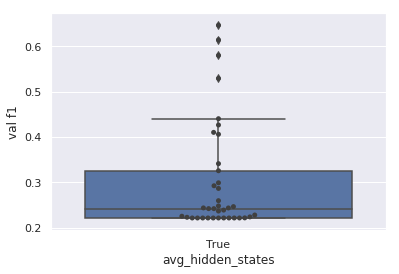

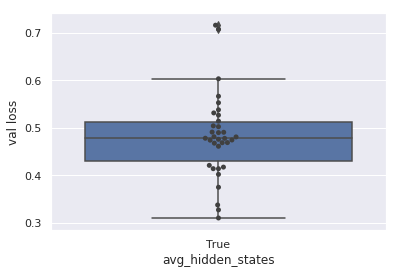

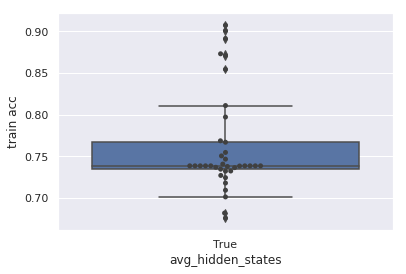

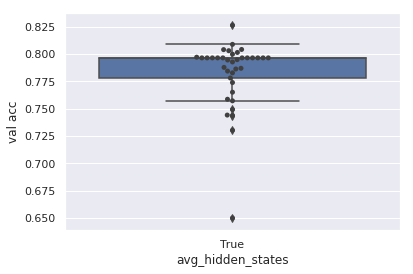

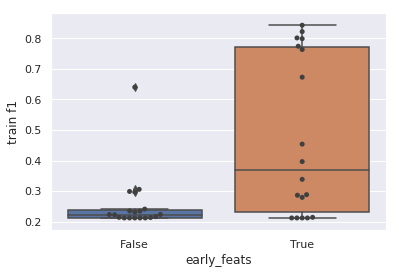

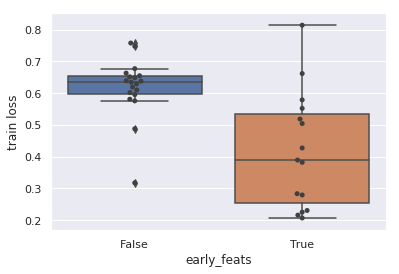

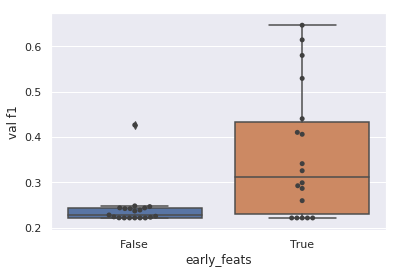

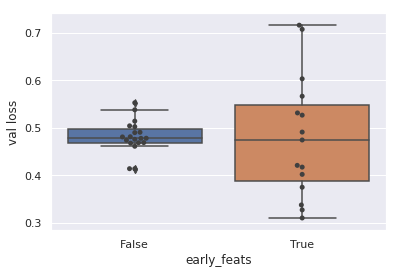

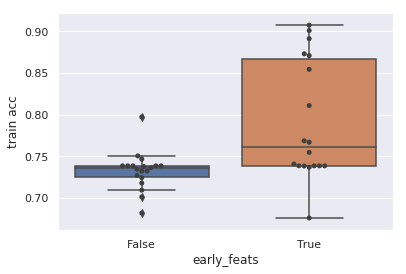

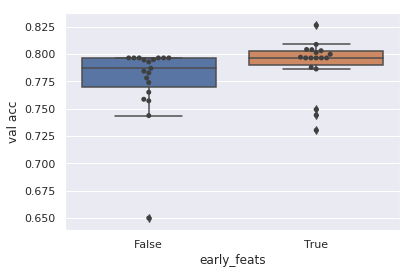

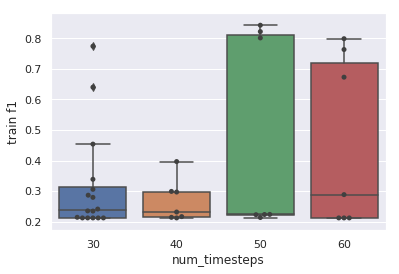

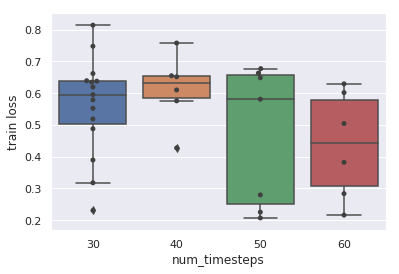

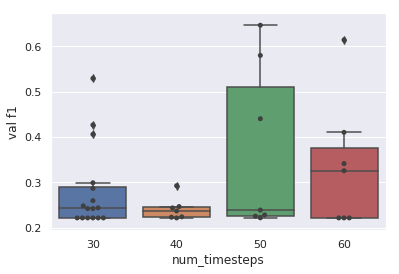

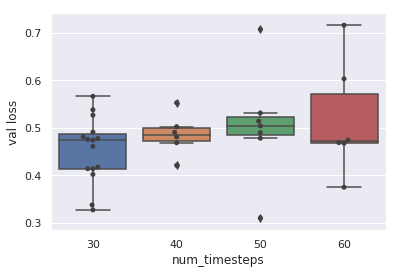

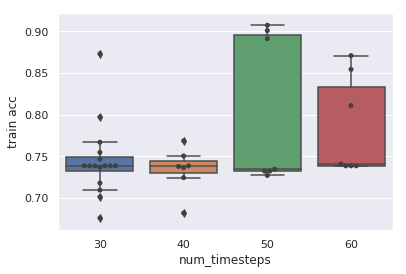

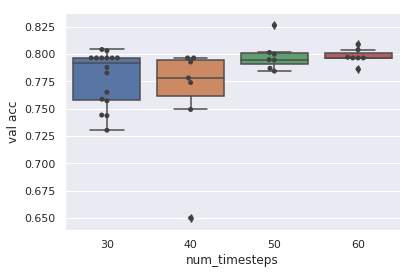

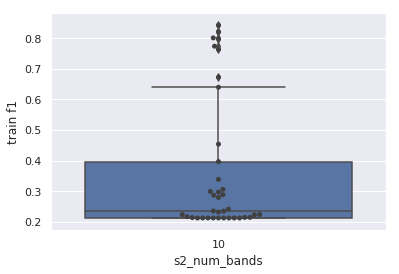

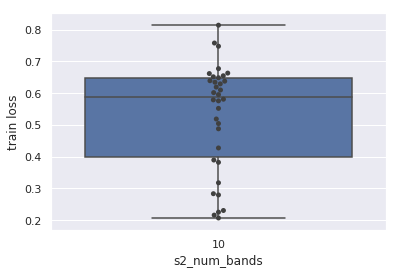

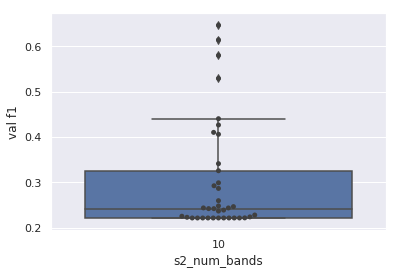

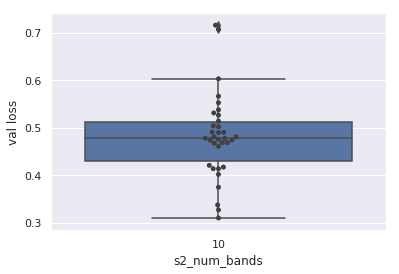

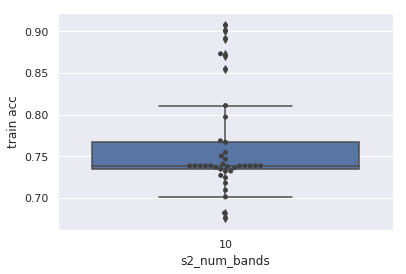

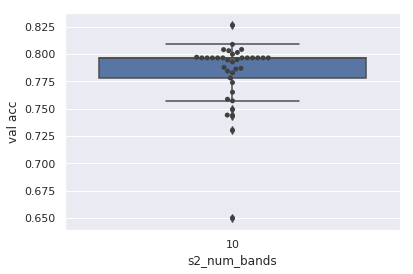

In [14]:
plot_hps('/home/robin/Documents/robin/crop-type-mapping/rs_mi_ss.pkl')